<a href="https://colab.research.google.com/github/Samiksha2706/HS_ML/blob/main/Copy_of_Lumpy_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import psutil

print('RAM memory % used:', psutil.virtual_memory()[2])

print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

RAM memory % used: 5.9
RAM Used (GB): 0.491831296


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

TRAIN_DIR = "/content/drive/MyDrive/DATASET"
CLASS = ['severe','normal_cattle','MILD']

Mounted at /content/drive


# New Section

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
base_model = InceptionV3(input_shape=(256,256,3),include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

X = Flatten()(base_model.output)
X=Dense(units=3, activation='sigmoid')(X)
model = Model(base_model.input ,X)
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center = True ,
                                   rotation_range=0.4 ,
                                   width_shift_range=0.3 ,
                                   horizontal_flip = True,
                                   preprocessing_function = preprocess_input ,
                                   zoom_range = 0.4,
                                   shear_range = 0.4 )

In [ ]:
train_data = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/DATASET" ,
                                               target_size=(256,256),
                                               batch_size = 64)

Found 1940 images belonging to 3 classes.


In [ ]:
train_data.class_indices

t_img , label = train_data.next()

t_img.shape

(64, 256, 256, 3)

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
mc = ModelCheckpoint(filepath = "./best_model.h5",
                     monitor = "accuracy",
                     verbose=1,
                     save_best_only=True)
es = EarlyStopping(monitor="accuracy",
                   min_delta=0.01 ,
                   patience=5 ,
                   verbose=1)
cb = [mc,es]

In [ ]:
his = model.fit_generator(train_data,
                          steps_per_epoch= 5 ,
                          epochs= 10 ,
                          callbacks=cb)

Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 5.5408 - accuracy: 0.4674 
Epoch 1: accuracy improved from -inf to 0.46739, saving model to ./best_model.h5
5/5 [==============================] - 133s 23s/step - loss: 5.5408 - accuracy: 0.4674
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 3.7481 - accuracy: 0.5594 
Epoch 2: accuracy improved from 0.46739 to 0.55937, saving model to ./best_model.h5
5/5 [==============================] - 119s 22s/step - loss: 3.7481 - accuracy: 0.5594
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 1.4242 - accuracy: 0.6281 
Epoch 3: accuracy improved from 0.55937 to 0.62813, saving model to ./best_model.h5
5/5 [==============================] - 103s 19s/step - loss: 1.4242 - accuracy: 0.6281
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 1.4727 - accuracy: 0.6094 
Epoch 4: accuracy did not improve from 0.62813
5/5 [==============================] - 88s 16s/step - loss: 1.4727 - ac

In [ ]:
from keras.models import load_model

best_model = load_model('./best_model.h5')

In [ ]:
#  Test and validation
#Prepare the test data:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/DATASET",
    target_size=(256, 256),
    batch_size=64,
    class_mode='categorical')

# Evaluate the model on the test data:
test_loss, test_accuracy = best_model.evaluate(test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Found 1940 images belonging to 3 classes.
31/31 [==============================] - 305s 10s/step - loss: 0.3527 - accuracy: 0.8510
Test loss: 0.3527020215988159
Test accuracy: 0.8510309457778931


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

31/31 [==============================] - 313s 10s/step


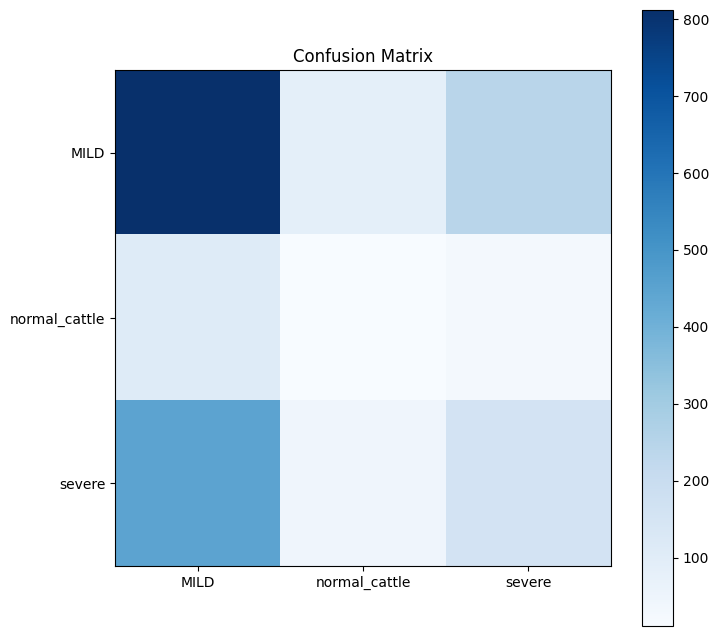

In [ ]:
y_pred = best_model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(3), test_data.class_indices.keys())
plt.yticks(np.arange(3), test_data.class_indices.keys())
plt.show()

31/31 [==============================] - 318s 10s/step


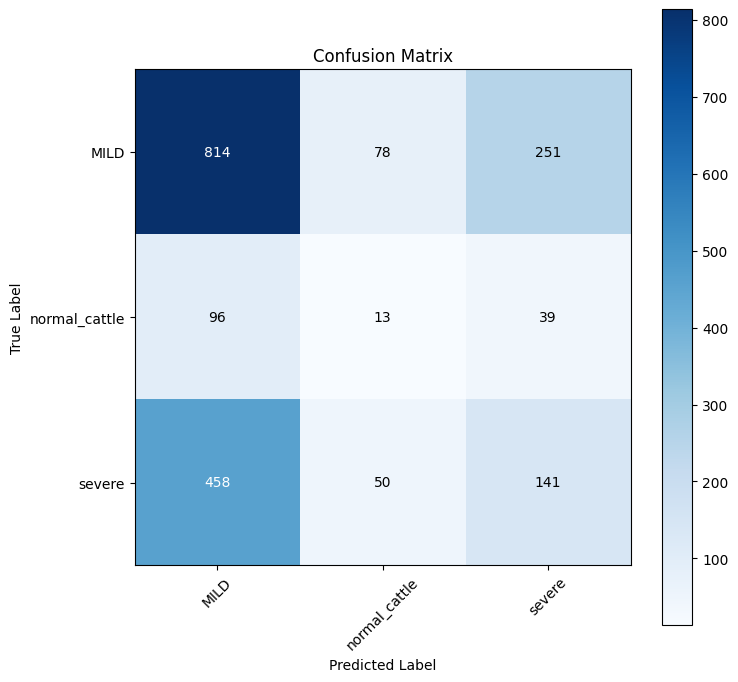

In [ ]:
import matplotlib.pyplot as plt

y_pred = best_model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(3), test_data.class_indices.keys(), rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(np.arange(3), test_data.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()


In [ ]:
print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))


               precision    recall  f1-score   support

         MILD       0.59      0.71      0.65      1143
normal_cattle       0.08      0.07      0.08       148
       severe       0.36      0.24      0.29       649

     accuracy                           0.51      1940
    macro avg       0.35      0.34      0.34      1940
 weighted avg       0.48      0.51      0.48      1940



In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random


In [ ]:
data=[]
for category in CLASS:
  path = os.path.join(TRAIN_DIR,category)
  label=CLASS.index(category)
  print(label)

  for img in os.listdir(path):
    imgpath=os.path.join(path,img)
    pet_img=cv2.imread(imgpath,1)
    try:
      pet_img=cv2.resize(pet_img,(64,64))
      image=np.array(pet_img).flatten()

      data.append([image,label])
    except Exception as e:
      pass


0
1
2


In [ ]:
print(len(data))

pick_in = open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

pick_in = open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features=[]
labels=[]

1959


In [ ]:
for feature ,label in data:
  features.append(feature)
  labels.append(label)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=28)

# Initialize the Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predicted = model.predict(X_test)

# Check the accuracy of the model
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.6096938775510204


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Confusion Matrix:
 [[102   6  32]
 [  8  14   5]
 [ 74  28 123]]


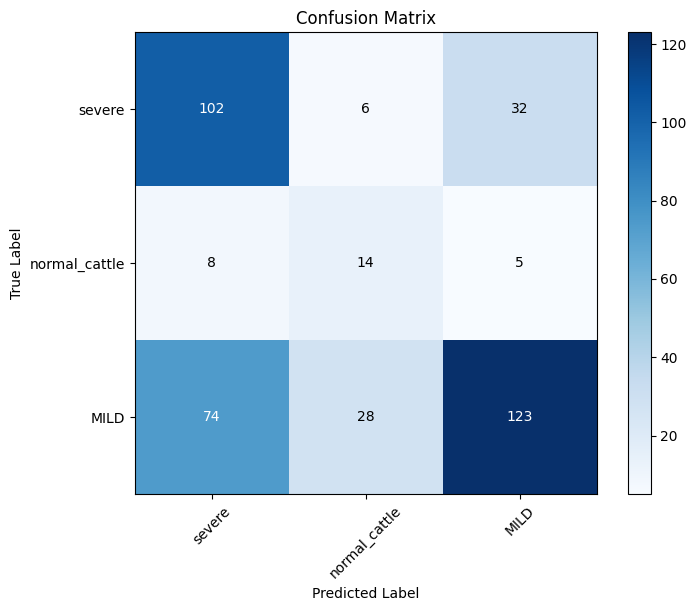

In [ ]:
cm = confusion_matrix(y_test, predicted)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(CLASS)), CLASS, rotation=45)  # Replace CLASS with your actual class names
plt.yticks(np.arange(len(CLASS)), CLASS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(len(CLASS)):
    for j in range(len(CLASS)):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, predicted))

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.73      0.63       140
           1       0.29      0.52      0.37        27
           2       0.77      0.55      0.64       225

    accuracy                           0.61       392
   macro avg       0.54      0.60      0.55       392
weighted avg       0.66      0.61      0.62       392

